# BOOKING TRAVEL AGENCY DATA ANALYSIS

DATA ANALYSIS STORY:

"A travel agency named Gezinomi wants to to get to know its customers more closely through its sales, to learn certain trends and to learn more about its earnings. The company aims to increase its profits by generating various sales ideas according to customers' preferences."
For this reasons,the following analyses were done:

                                                                                                                Berna Ersarı

__REVENUE ANALYSIS:__

* Monthly/Yearly Revenue: Analyzing the distribution of revenue by sales date on a monthly and yearly basis.
* Price Distribution: Analyzing the distribution of prices according to seasons and calculating average prices.


__BOOKING LEAD TIME ANALYSIS:__

* Days Between Reservation and Check-in: Analyzing how many days in advance reservations are typically made to identify early booking trends.
* Revenue by Lead Time: Comparing the revenue generated by early bookings versus last-minute bookings.

__CONCEPT ANALYSIS:__

* Revenue by City&Concept: Analyzing the revenue generated by each concept (Cities&All Inclusive, Half Board, Bed & Breakfast).
* Concept Popularity: Determining which concept is preferred the most.

__CITY AND SEASON ANALYSIS:__

* Revenue by Season: Comparing revenue during high and low seasons.
* City and Season Combination: Analyzing which cities are preferred in which seasons.

__CHECK-IN DAY ANALYSIS:__

* Distribution by Check-in Day: Analyzing which days have the most check-ins 

__CUSTOMER BEHAVIOR ANALYSIS:__

* Seasonal Trends: Analyzing the increase and decrease in reservations during specific periods.

__PREDICTION:__

* Future Revenue Predictions: Predicting future revenues based on past data. Potential Customer Revenue Calculation With Rule-Based Classification 


In [24]:
#Import libraries for define dataframe and visualization
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("C:/Users/brnersr/gezinomi.xlsx")

In [25]:
#Let's look at the random 10 per cent recordings in the dataframe.
df.sample(frac=0.1)

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
47091,268006,2020-07-29,2020-07-30,35.663338,Herşey Dahil,Muğla,Thursday,1,High
1349,380794,2022-06-26,2022-07-14,57.997558,Herşey Dahil,Antalya,Thursday,18,High
13150,374405,2022-06-05,2022-06-06,37.000000,Herşey Dahil,Aydın,Monday,1,High
41665,181639,2018-08-14,2018-09-30,13.795703,Oda + Kahvaltı,Girne,Sunday,47,High
47759,265343,2020-07-22,2020-07-24,18.259629,Herşey Dahil,Antalya,Friday,2,High
...,...,...,...,...,...,...,...,...,...
52449,179639,2018-08-05,2018-08-17,80.110811,Herşey Dahil,Muğla,Friday,12,High
21625,349004,2022-02-12,2022-07-30,25.437576,Herşey Dahil,Muğla,Saturday,168,High
57161,84651,2016-08-27,2016-09-12,33.865066,Herşey Dahil,Antalya,Monday,16,High
4158,399092,2022-08-23,2022-08-26,99.206349,Herşey Dahil,Antalya,Friday,3,High


In [26]:
city_count=df['SaleCityName'].value_counts()

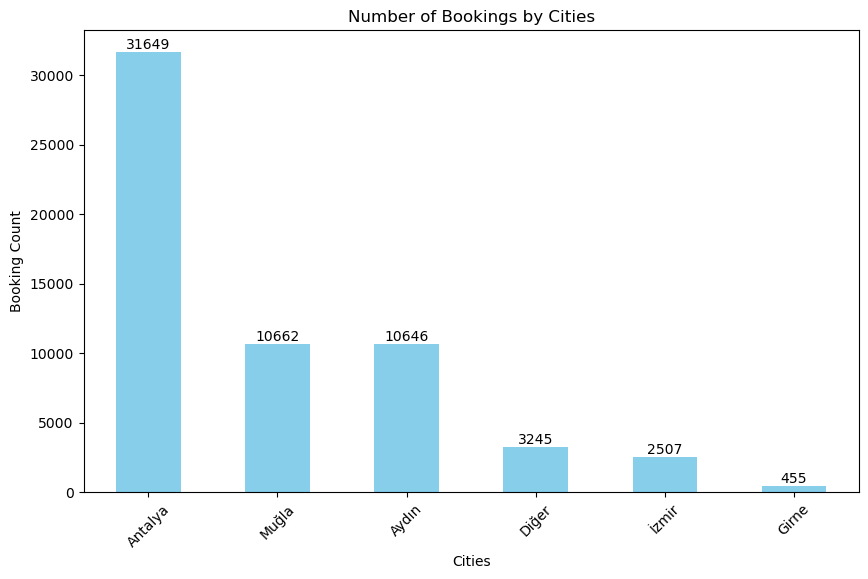

In [27]:
#Number of bookings by cities

plt.figure(figsize=(10, 6))
ax =city_count.plot(kind='bar', color='skyblue')
plt.xlabel('Cities')
plt.ylabel('Booking Count')
plt.title('Number of Bookings by Cities')
plt.xticks(rotation=45)
for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()

Comment:-Number of Booking by Cities-

According to the graph above, the city of Antalya is the most preferred city, followed by Muğla and Aydın.

In [28]:
#Which is the most preferred concept?

concept_count=df["ConceptName"].value_counts()

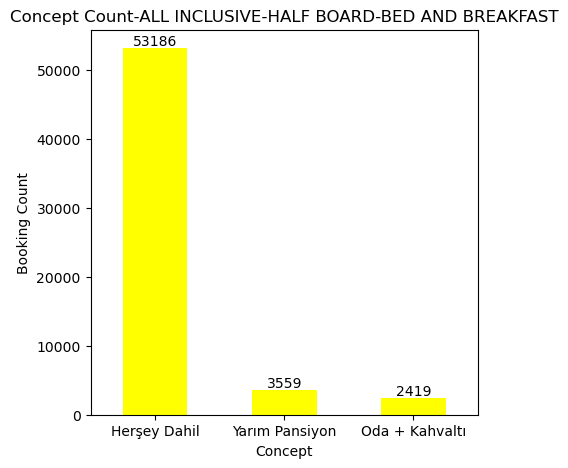

In [29]:
plt.figure(figsize=(5,5))
axx =concept_count.plot(kind='bar', color="yellow")
plt.xlabel('Concept')
plt.ylabel('Booking Count')
plt.title('Concept Count-ALL INCLUSIVE-HALF BOARD-BED AND BREAKFAST')
plt.xticks(rotation=0)
for p in axx.containers:
    axx.bar_label(p, label_type='edge')
plt.show()

Comment:-Concept-

According to chart above, "All Inclusive" option is the most popular.

In [30]:
#Seasonal Distribution Rate 
season_count=df['Seasons'].value_counts()

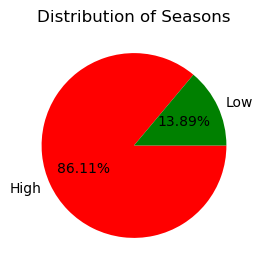

In [31]:
plt.figure(figsize=(3,3))
plt.pie(season_count, labels=season_count.index, autopct='%2.2f%%', startangle=50, colors=["r","g"])
plt.title('Distribution of Seasons')
plt.show()

In [32]:
#Distribution of Revenues by Season

df.groupby(["Seasons"]).agg({"Price": ["sum", "count"]})

Price       
                  sum  count
Seasons                     
High     3.182628e+06  50936
Low      4.459937e+05   8215

In [33]:
#What's the total price of the company?

cities_price=df.groupby('SaleCityName').agg({"Price":"sum"}).sort_values(by="Price",ascending=False)
total_price=cities_price["Price"].sum()

In [123]:
total_price

3628621.4706279356

Comment:-Seasonal Distribution Rate & Distribution of Revenues by Season

Most of the bookings are made during the high season. Also, 87.70 per cent of the revenue is earned in the high season.

In [34]:
#What is the company's total earnings at the annual threshold?

yearly_reservations_totalprice = df.resample('Y', on='SaleDate')["Price"].sum()

In [35]:
dff=yearly_reservations_totalprice.reset_index()
dff

,SaleDate,Price
0,2016-12-31,2.063315e+05
1,2017-12-31,1.788262e+05
2,2018-12-31,1.659549e+05
3,2019-12-31,1.682402e+05
4,2020-12-31,3.681528e+05
5,2021-12-31,1.160029e+06
6,2022-12-31,1.381087e+06


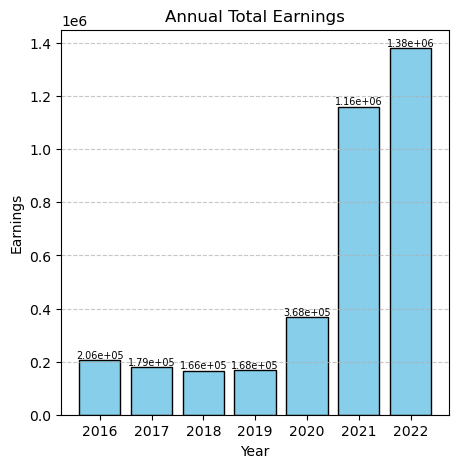

In [20]:
plt.figure(figsize=(5, 5))
bars=plt.bar(dff['SaleDate'].dt.year,dff['Price'], color='skyblue', edgecolor='black')
plt.title('Annual Total Earnings')
plt.xlabel('Year')
plt.ylabel('Earnings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2e}', ha='center', va='bottom', fontsize=7)

plt.show()

In [38]:
def calculate_percentage_growth(dff):
    dff['Percentage Growth'] = round(dff['Price'].pct_change() * 100,2)
    return dff

dff = calculate_percentage_growth(dff)
dff

,SaleDate,Price,Percentage Growth
0,2016-12-31,2.063315e+05,NaN
1,2017-12-31,1.788262e+05,-13.33
2,2018-12-31,1.659549e+05,-7.20
3,2019-12-31,1.682402e+05,1.38
4,2020-12-31,3.681528e+05,118.83
5,2021-12-31,1.160029e+06,215.09
6,2022-12-31,1.381087e+06,19.06


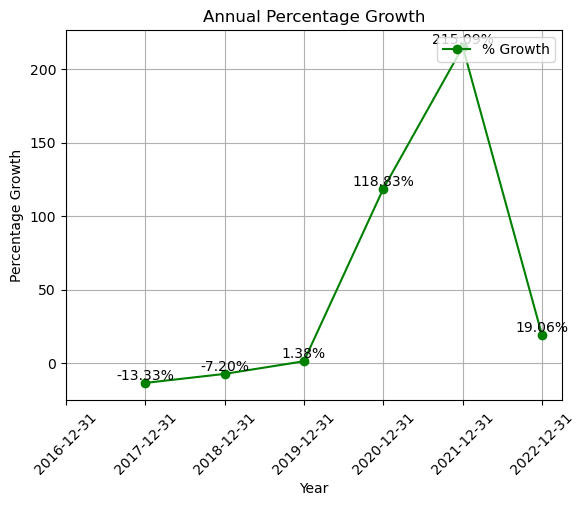

In [61]:
plt.plot(dff['SaleDate'], dff['Percentage Growth'], color='green', marker='o', label='% Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.title('Annual Percentage Growth')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(dff['SaleDate'], rotation=45)
for i, txt in enumerate(dff['Percentage Growth']):
    if pd.notna(txt):
        plt.text(dff['SaleDate'][i], dff['Percentage Growth'][i], f'{txt:.2f}%', ha='center', va='bottom')
plt.show()

Comment:-Annual Earnings & Annual Growth-

When we take a look at the company's annual revenue distribution, we see that the earnings were at negative values in 2017 and 2018. Since 2019, the trend has started to move upwards. The company may have changed its marketing strategies. When evaluated compared to 2020, the growth rate in 2021 is 118 per cent. This may be due to the covid epidemic in 2020. In 2021, the end of house lockdown and more bookings by people may have positively affected the growth rate. We see that the growth rate of 2021 is almost 2 times higher than the growth rate of 2020. We see that the most earnings are in 2022. There is a 19 per cent growth compared to the previous year.  It can be said that the amount of earnings in the last 2 years is quite high compared to the first years.

In [86]:
#What is the company's total booking count at the monthly threshold?

monthly_reservations_totalcount = df.resample('M', on='SaleDate')["SaleId"].count()
dfm=monthly_reservations_totalcount.reset_index()
dfm.sort_values(by="SaleId", ascending=False)

,SaleDate,SaleId
65,2021-06-30,4502
79,2022-08-31,3668
67,2021-08-31,3663
66,2021-07-31,3562
77,2022-06-30,3148
...,...,...
10,2016-11-30,39
83,2022-12-31,36
50,2020-03-31,15
52,2020-05-31,5


Comment: -Monthly Booking Count-

According to the table above and graph below, there is an increase in the number of bookings in the summer months, which confirms the situation regarding the number of high and low season bookings that we have previously evaluated. We can say that this situation is affected by the fact that both schools are on holiday and employees use their annual leave mostly in summer.

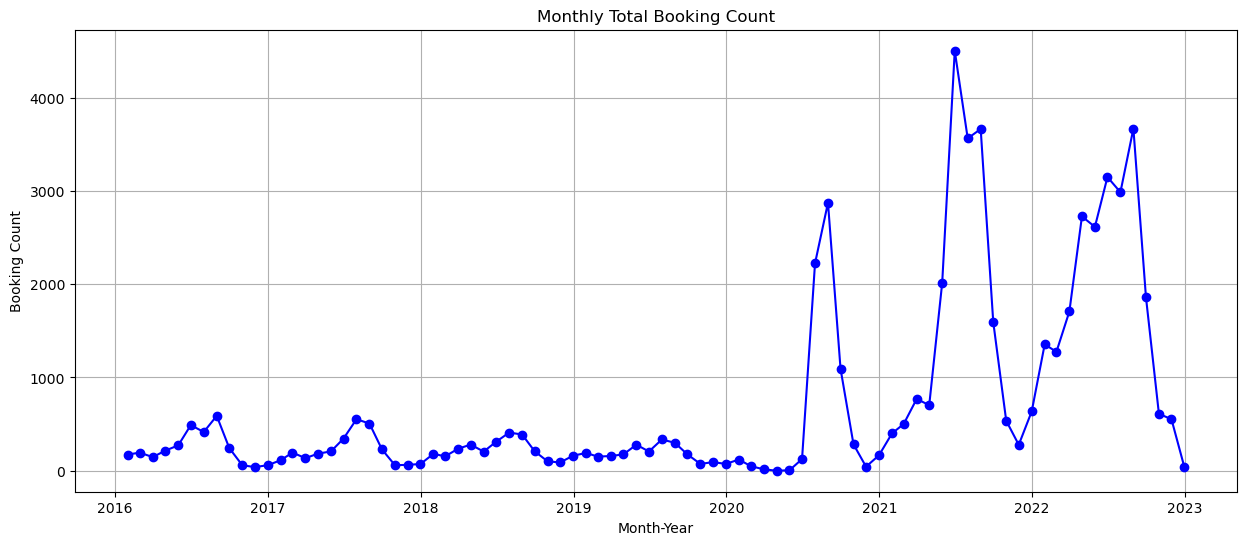

In [87]:
plt.figure(figsize=(15, 6))
plt.plot(dfm['SaleDate'], dfm['SaleId'], marker='o', linestyle='-', color='b')
plt.title('Monthly Total Booking Count')
plt.xlabel('Month-Year')
plt.ylabel('Booking Count')
plt.grid(True)
plt.show()

In [88]:
#What percentage of total earnings does each city's earnings represent?

cities_earn['Percentage_earn'] = (cities_earn['Price'] / total_earn) * 100
cities_earn

,Price,Percentage_earn
SaleCityName,,
Antalya,2.041911e+06,56.272364
Muğla,6.658422e+05,18.349729
Aydın,5.732960e+05,15.799278
İzmir,1.659348e+05,4.572944
Diğer,1.545723e+05,4.259808
Girne,2.706503e+04,0.745876


Comment:- City's Earning-

We see that, 56 per cent of the revenue is generated from Antalya city bookings.

In [89]:
#Average earnings by concept type and city

df.pivot_table("Price","SaleCityName","ConceptName",aggfunc="mean")

ConceptName,Herşey Dahil,Oda + Kahvaltı,Yarım Pansiyon
SaleCityName,,,
Antalya,64.519028,63.504816,67.190613
Aydın,53.995467,34.458787,30.016543
Diğer,84.771093,37.599082,42.113440
Girne,97.680970,39.775536,53.247838
Muğla,63.020053,59.037763,45.120924
İzmir,74.701519,41.320342,59.610053


In [63]:
#Booking counts by concept type and city

df.pivot_table("SaleId","SaleCityName","ConceptName",aggfunc="count")

ConceptName,Herşey Dahil,Oda + Kahvaltı,Yarım Pansiyon
SaleCityName,,,
Antalya,30795,598,256
Aydın,10577,38,31
Diğer,506,761,1978
Girne,106,139,210
Muğla,9820,655,187
İzmir,1382,228,897


Comment:- Average Earnings & Booking Counts by concept type and city

In Antalya, the "All Inclusive" concept is much more preferred than the other two concepts;
In Aydın, "All Inclusive" concept is the most preferred accommodation type in Aydın. Although, "Bed+Breakfast" and "Half Board" are quite affordable in terms of price, the low sales figures show that these accommodation types are less preferred.
In other cities, the Half Board concept has the highest number of sales. The "All Inclusive" concept, which is the highest among average prices, has the lowest number of sales. This indicates that more affordable accommodation options are more preferred in other cities.
The number of sales for each concept in Girne is close to each other and the average prices are high compared to other cities. This indicates that hotels in Girne have high prices, but sales are distributed over these prices.
In Muğla, the "All Inclusive" concept has the highest number of sales. Although average prices are relatively low, there is a significant difference in the number of sales.
In Izmir, the "All Inclusive" concept again has the highest number of sales. However, the Half Board concept also has a high number of sales and average prices are reasonable.

In [25]:
#Segmentation according to customers' booking pace information

In [90]:
bins = [-1, 7, 30, 90, df["SaleCheckInDayDiff"].max()]
labels = ["Last Minuters", "Potential Planners", "Planners", "Early Bookers"]
df["Booking_Pace"] = pd.cut(df["SaleCheckInDayDiff"], bins, labels=labels)

In [91]:
df

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,Booking_Pace
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low,Last Minuters
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High,Last Minuters
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low,Last Minuters
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low,Last Minuters
...,...,...,...,...,...,...,...,...,...,...
59159,51817,2016-01-05,2016-10-10,54.304636,Herşey Dahil,Antalya,Monday,279,Low,Early Bookers
59160,51816,2016-01-05,2016-10-10,54.304636,Herşey Dahil,Antalya,Monday,279,Low,Early Bookers
59161,51814,2016-01-05,2016-01-06,40.562914,Herşey Dahil,Diğer,Wednesday,1,Low,Last Minuters
59162,51736,2016-01-04,2016-01-05,69.847682,Yarım Pansiyon,Diğer,Tuesday,1,Low,Last Minuters


In [93]:
#The number of customers that check-in for each day

df['CInDay'].value_counts()

Monday       12794
Saturday      9967
Friday        8683
Thursday      7314
Sunday        7050
Tuesday       6807
Wednesday     6549
Name: CInDay, dtype: int64

Comment:-Check-in Days-

Mondays and Saturdays are the days with the highest number of check-ins. This indicates that holiday or business travellers are busy at the beginning of the week and on weekends.
Check-in numbers are lower on weekdays (especially Tuesday and Wednesday). This may indicate that there is less mid-week travel or that hotels are less full on these days.
Fridays show an increase in check-in numbers as it is the day before the weekend. This indicates that people travelling for the weekend break are checking into hotels on Friday.

Considering the high demand on mondays and saturdays, hotels may organise special campaigns or promotions.
Discounts or special packages can be offered to increase occupancy rates during low demand periods such as Tuesdays and Wednesdays.

In [94]:
#Revenue distribution by "booking pace" and  number of customers based on "booking pace"

df.groupby(["Booking_Pace"]).agg({"Price": ["sum", "count"]})

Price       
                             sum  count
Booking_Pace                           
Last Minuters       1.581985e+06  26558
Potential Planners  1.018682e+06  16617
Planners            5.947396e+05   9182
Early Bookers       4.332144e+05   6794

Comment: -Booking Pace-
    
Customers are not in the habit of booking very early. To encourage customers to book earlier, you can offer flexible cancellation facility for early booking, free meal promotion, free room type upgrade option, email reminders of early booking benefits, extra discounts for those who book between certain dates, etc.
Increasing prices closer to the booking date can also prove that early booking is financially advantageous.

In [95]:
#Average earnings and number of customers by city&concept&booking pace

df.groupby(["SaleCityName", 'ConceptName', "Booking_Pace" ]).agg({"Price": ["mean", "count"]})

Price       
                                                     mean  count
SaleCityName ConceptName    Booking_Pace                        
Antalya      Herşey Dahil   Last Minuters       62.752916  14148
                            Potential Planners  64.903700   8874
                            Planners            67.879960   4490
                            Early Bookers       66.494885   3281
             Oda + Kahvaltı Last Minuters       65.353740    503
...                                                   ...    ...
İzmir        Oda + Kahvaltı Early Bookers       66.928111      3
             Yarım Pansiyon Last Minuters       57.788126    636
                            Potential Planners  64.804043    198
                            Planners            60.507887     47
                            Early Bookers       65.905583     14

[72 rows x 2 columns]

In [29]:
#Average earnings and number of customers by city&concept&seasons

df.groupby(by=["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean", "count"]})

Price       
                                           mean  count
SaleCityName ConceptName    Seasons                   
Antalya      Herşey Dahil   High      64.920065  27126
                            Low       61.552427   3667
             Oda + Kahvaltı High      66.267969    303
                            Low       60.666730    295
             Yarım Pansiyon High      73.259029    118
                            Low       62.001678    138
Aydın        Herşey Dahil   High      54.946560  10103
                            Low       33.680699    473
             Oda + Kahvaltı High      30.387530     27
                            Low       44.451874     11
             Yarım Pansiyon High      32.626152     20
                            Low       25.271799     11
Diğer        Herşey Dahil   High      83.787273    364
                            Low       87.310882    141
             Oda + Kahvaltı High      34.839543    349
                            Low       39.959569    408
             Yarım Pansiyon High      39.731916    516
                            Low       42.953978   1462
Girne        Herşey Dahil   High     103.935448     55
                            Low       90.935944     51
             Oda + Kahvaltı High      39.479630     66
                            Low       40.043067     73
             Yarım Pansiyon High      58.383668    100
                            Low       48.578903    110
Muğla        Herşey Dahil   High      63.384036   9582
                            Low       48.304086    237
             Oda + Kahvaltı High      61.264691    592
                            Low       37.774192     62
             Yarım Pansiyon High      45.823698    177
                            Low       32.681812     10
İzmir        Herşey Dahil   High      74.748363   1234
                            Low       74.308287    147
             Oda + Kahvaltı High      54.141797     86
                            Low       33.555235    142
             Yarım Pansiyon High      87.657303    118
                            Low       55.350626    777

Comment:-Average earnings and number of customers by city&concept&seasons-
    
It may be possible to increase occupancy rates with early booking discounts, especially in the low season, as prices drop significantly. Special campaigns and packages can be offered to further increase demand during the peak season, and promotions can be made according to each concept to attract customers. 

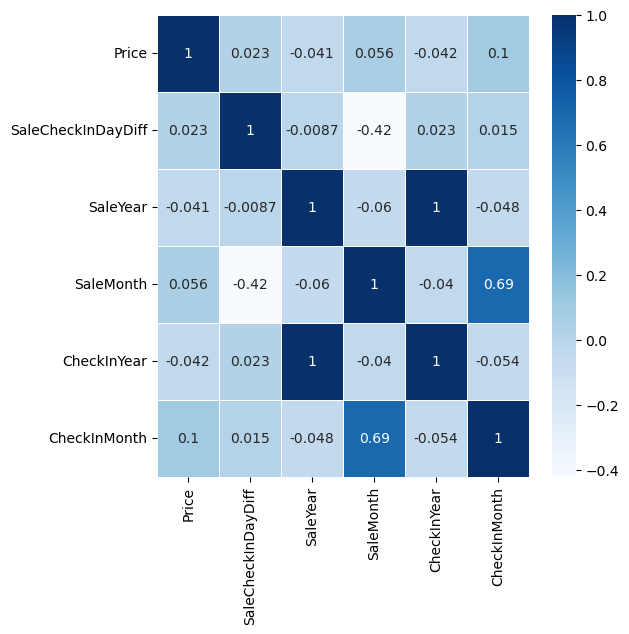

In [121]:
import seaborn as sns

df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month
df['CheckInYear'] = df['CheckInDate'].dt.year
df['CheckInMonth'] = df['CheckInDate'].dt.month
correlation_matrix = df[['Price', 'SaleCheckInDayDiff', 'SaleYear', 'SaleMonth', 'CheckInYear', 'CheckInMonth']].corr()
plt.figure(figsize=(6, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths = 0.5 )
plt.show()

Comment:
Overall,there is no strong correlation between the variables.The most notable relationships are between the sale year and 
check-in year (0.996704) and between the sale month and check-in month (0.690217), indicating that sales and check-ins 
generally occur within the same year and month.
Which means there are a lot more "last minuters" customers. Customers are not in the habit of booking very early.
All other correlations are quite weak, suggesting no significant relationships between the variables. 
Campaigns and early booking discounts can encourage customers to book early.

In [ ]:
#POTENTIAL CUSTOMER REVENUE CALCULATION WITH RULE-BASED CLASSIFICATION

In [96]:
new_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price", ascending=False)

In [97]:
new_df

Price
SaleCityName ConceptName    Seasons            
Girne        Herşey Dahil   High     103.935448
                            Low       90.935944
İzmir        Yarım Pansiyon High      87.657303
Diğer        Herşey Dahil   Low       87.310882
                            High      83.787273
İzmir        Herşey Dahil   High      74.748363
                            Low       74.308287
Antalya      Yarım Pansiyon High      73.259029
             Oda + Kahvaltı High      66.267969
             Herşey Dahil   High      64.920065
Muğla        Herşey Dahil   High      63.384036
Antalya      Yarım Pansiyon Low       62.001678
             Herşey Dahil   Low       61.552427
Muğla        Oda + Kahvaltı High      61.264691
Antalya      Oda + Kahvaltı Low       60.666730
Girne        Yarım Pansiyon High      58.383668
İzmir        Yarım Pansiyon Low       55.350626
Aydın        Herşey Dahil   High      54.946560
İzmir        Oda + Kahvaltı High      54.141797
Girne        Yarım Pansiyon Low       48.578903
Muğla        Herşey Dahil   Low       48.304086
             Yarım Pansiyon High      45.823698
Aydın        Oda + Kahvaltı Low       44.451874
Diğer        Yarım Pansiyon Low       42.953978
Girne        Oda + Kahvaltı Low       40.043067
Diğer        Oda + Kahvaltı Low       39.959569
             Yarım Pansiyon High      39.731916
Girne        Oda + Kahvaltı High      39.479630
Muğla        Oda + Kahvaltı Low       37.774192
Diğer        Oda + Kahvaltı High      34.839543
Aydın        Herşey Dahil   Low       33.680699
İzmir        Oda + Kahvaltı Low       33.555235
Muğla        Yarım Pansiyon Low       32.681812
Aydın        Yarım Pansiyon High      32.626152
             Oda + Kahvaltı High      30.387530
             Yarım Pansiyon Low       25.271799

In [98]:
new_df.reset_index(inplace=True)

In [99]:
new_df['sales_level_based'] =new_df[["SaleCityName", "ConceptName", "Seasons"]].agg(lambda x: '_'.join(x).upper(), axis=1)

In [100]:
new_df

,SaleCityName,ConceptName,Seasons,Price,sales_level_based
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH
5,İzmir,Herşey Dahil,High,74.748363,İZMIR_HERŞEY DAHIL_HIGH
6,İzmir,Herşey Dahil,Low,74.308287,İZMIR_HERŞEY DAHIL_LOW
7,Antalya,Yarım Pansiyon,High,73.259029,ANTALYA_YARIM PANSIYON_HIGH
8,Antalya,Oda + Kahvaltı,High,66.267969,ANTALYA_ODA + KAHVALTI_HIGH
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH


In [101]:
new_df['Customer_Segment']=pd.qcut(new_df["Price"],3,labels=["C","B","A"])

In [102]:
new_df['encoding_season'] = new_df['Seasons'].apply(lambda x: 1 if x == 'High' else 0)

In [103]:
new_df

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,Customer_Segment,encoding_season
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A,1
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW,A,0
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH,A,1
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW,A,0
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH,A,1
5,İzmir,Herşey Dahil,High,74.748363,İZMIR_HERŞEY DAHIL_HIGH,A,1
6,İzmir,Herşey Dahil,Low,74.308287,İZMIR_HERŞEY DAHIL_LOW,A,0
7,Antalya,Yarım Pansiyon,High,73.259029,ANTALYA_YARIM PANSIYON_HIGH,A,1
8,Antalya,Oda + Kahvaltı,High,66.267969,ANTALYA_ODA + KAHVALTI_HIGH,A,1
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,A,1


In [104]:
new_df['Customer_Segment_LH']=pd.qcut(new_df["encoding_season"],2,labels=["-",'+'])

In [105]:
new_df

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,Customer_Segment,encoding_season,Customer_Segment_LH
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A,1,+
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW,A,0,-
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH,A,1,+
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW,A,0,-
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH,A,1,+
5,İzmir,Herşey Dahil,High,74.748363,İZMIR_HERŞEY DAHIL_HIGH,A,1,+
6,İzmir,Herşey Dahil,Low,74.308287,İZMIR_HERŞEY DAHIL_LOW,A,0,-
7,Antalya,Yarım Pansiyon,High,73.259029,ANTALYA_YARIM PANSIYON_HIGH,A,1,+
8,Antalya,Oda + Kahvaltı,High,66.267969,ANTALYA_ODA + KAHVALTI_HIGH,A,1,+
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,A,1,+


In [106]:
new_df['Segment'] =new_df[["Customer_Segment","Customer_Segment_LH"]].agg(lambda x: ''.join(x), axis=1)

In [107]:
new_df.drop(["Customer_Segment","encoding_season","Customer_Segment_LH"],axis=1,inplace=True)

In [108]:
new_df.sort_values(by="Price",ascending=False)

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,Segment
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A+
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW,A-
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH,A+
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW,A-
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH,A+
5,İzmir,Herşey Dahil,High,74.748363,İZMIR_HERŞEY DAHIL_HIGH,A+
6,İzmir,Herşey Dahil,Low,74.308287,İZMIR_HERŞEY DAHIL_LOW,A-
7,Antalya,Yarım Pansiyon,High,73.259029,ANTALYA_YARIM PANSIYON_HIGH,A+
8,Antalya,Oda + Kahvaltı,High,66.267969,ANTALYA_ODA + KAHVALTI_HIGH,A+
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,A+


In [109]:
new_user = "AYDIN_ODA + KAHVALTI_LOW"

In [110]:
new_df[new_df["sales_level_based"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,Segment
22,Aydın,Oda + Kahvaltı,Low,44.451874,AYDIN_ODA + KAHVALTI_LOW,B-


In [111]:
new_user = "GIRNE_HERŞEY DAHIL_HIGH"

In [112]:
new_df[new_df["sales_level_based"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,Segment
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A+
